In [1]:
# import necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from plotly.offline import init_notebook_mode, iplot,init_notebook_mode
init_notebook_mode(connected=True)

from scipy import stats

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
# read csv file
survey = pd.read_csv("C:/Users/tala_/Desktop/Projects/Mental Health in Tech/survey.csv")

In [3]:
# copy df
survey_copy = survey.copy()

# EDA

In [4]:
# row and column count
print(survey.shape)

# data types
print(survey.info())

# distribution of data
print(survey.describe())

(1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 1

In [5]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
# Look for null values
survey.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
# drop unnecessary columns
survey = survey.drop(['comments','state','Timestamp'], axis= 1)

In [8]:
# imputing the null values

# 'work interfere' - impute nulls with 'Not Applicable' as it means no mental health condition
survey['work_interfere'].fillna('Not Applicable',inplace=True)

In [9]:
# convert all genders to lower case to make it easier to clean up
survey['Gender'] = survey['Gender'].str.lower()

# look at unique values of genders
print(survey['Gender'].unique())

['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'male ' 'man' 'trans woman'
 'msle' 'neuter' 'female (trans)' 'queer' 'female (cis)' 'mail'
 'a little about you' 'malr' 'p' 'femail' 'cis man'
 'ostensibly male, unsure what that really means']


In [10]:
# Clean the 'Gender' column by grouping similar values
male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", 
            "mail", "malr","cis man", "Cis Male", "cis male"]

female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

other = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", 
             "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
# apply grouping
for (row, col) in survey.iterrows():

    if str.lower(col.Gender) in male:
        survey['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female:
        survey['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in other:
        survey['Gender'].replace(to_replace=col.Gender, value='trans/queer/other', inplace=True)

In [11]:
survey[survey['Gender'] == 'a little about you']

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
989,8,a little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [12]:
survey[survey['Gender'] == 'p']

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [13]:
# after exploring these 2 rows, they seem to be invalid as they have extreme data, so let's filter them
invalid_cols = ['a little about you', 'p']
survey = survey[~survey['Gender'].isin(invalid_cols)]

In [14]:
# which brings a total of 3 unique values for gender: male, female, trans/queer/other
print(survey['Gender'].unique())

['female' 'male' 'trans/queer/other']


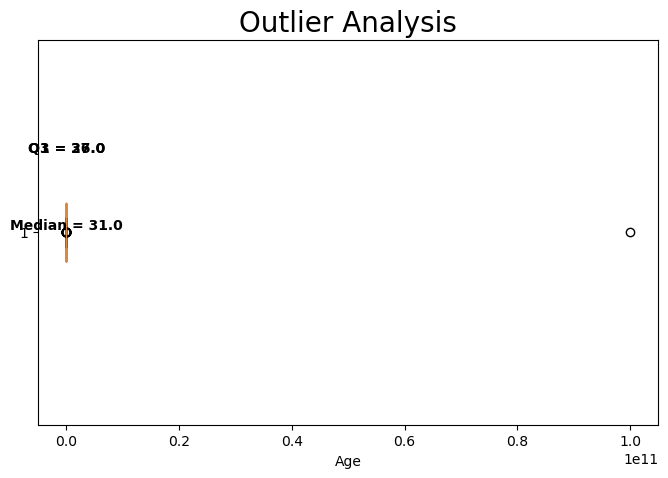

In [15]:
# Look for outliers in Age column
fig, ax = plt.subplots(figsize=(8,5))

# Create the boxplot
box = ax.boxplot(survey['Age'], vert=False)

# Add labels for the median and quartile values
median = np.median(survey['Age'])
q1, q3 = np.percentile(survey['Age'], [25, 75])
ax.text(median, 1, f'Median = {median:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(q1, 1.2, f'Q1 = {q1:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(q3, 1.2, f'Q3 = {q3:.1f}', ha='center', va='bottom', fontweight='bold')

# Set the x-axis label and title
ax.set_xlabel('Age')
ax.set_title('Outlier Analysis', fontsize=20)

plt.show()

In [16]:
# look at skewness
skewness = survey['Age'].skew()
print(skewness)

35.45419580247165


In [17]:
# quantile flooring to reduce outliers
def quantile_flooring(df, variable, q1=0.15, q3=0.85, multiplier=1.5):
    q1_val = df[variable].quantile(q1)
    q3_val = df[variable].quantile(q3)
    iqr = q3_val - q1_val
    upper_lim = q3_val + multiplier * iqr
    lower_lim = q1_val - multiplier * iqr
    df[variable] = np.clip(df[variable], lower_lim, upper_lim)

In [18]:
# perform quantile flooring on Age
quantile_flooring(survey, "Age")

In [19]:
# skewness has significantly decreased
skewness = survey['Age'].skew()
print(skewness)

0.7910549592308671


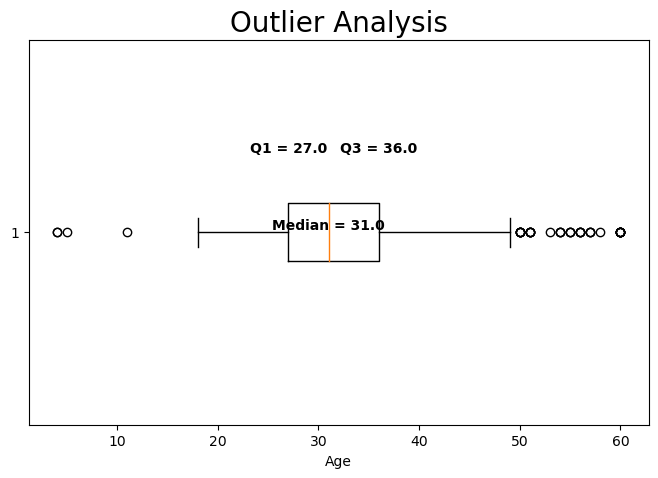

In [20]:
# Look for outliers in Age column
fig, ax = plt.subplots(figsize=(8,5))

# Create the boxplot
box = ax.boxplot(survey['Age'], vert=False)

# Add labels for the median and quartile values
median = np.median(survey['Age'])
q1, q3 = np.percentile(survey['Age'], [25, 75])
ax.text(median, 1, f'Median = {median:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(q1, 1.2, f'Q1 = {q1:.1f}', ha='center', va='bottom', fontweight='bold')
ax.text(q3, 1.2, f'Q3 = {q3:.1f}', ha='center', va='bottom', fontweight='bold')

# Set the x-axis label and title
ax.set_xlabel('Age')
ax.set_title('Outlier Analysis', fontsize=20)

plt.show()

In [21]:
# add 'Age bins' so we can use later in our analysis
survey['age_bins'] = pd.cut(survey['Age'], [0,20,30,40,50,60], labels=["0-20", "21-30", "31-40", "41-50","51-60"], include_lowest=True)

In [22]:
survey.head(1)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bins
0,37.0,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,31-40


In [23]:
# label encoding in order to perform regression on 'self-employed' and predict the null values
labelDict = {}
for feature in survey:
    # Create a LabelEncoder object
    le = preprocessing.LabelEncoder()
    le.fit(survey[feature])
    # Create a dictionary that maps the original feature values to the encoded values
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # Replace the original feature values with the encoded values in the survey dataset
    survey[feature] = le.transform(survey[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    # Replace the original feature values with the encoded values in the survey dataset
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [4.0, 5.0, 11.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0]
label_Gender ['female', 'male', 'trans/queer/other']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes', nan]
label_family_history ['No', 'Yes']
label_treatment ['No

In [24]:
survey.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bins
0,22,0,44,2,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,29,1,44,2,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,3
2,17,1,6,2,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,2
3,16,1,43,2,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,16,1,44,2,0,0,0,1,1,1,...,0,1,1,1,2,2,2,0,0,2


In [25]:
# label 2 is nan, so replace it with that
survey.loc[survey['self_employed'] == 2, 'self_employed'] = np.nan

In [26]:
# Split the data into training and test sets
train = survey[survey['self_employed'].notna()]
test = survey[survey['self_employed'].isna()]

# Fit a logistic regression model to predict the self employed variable
lr = LogisticRegression()
lr.fit(train.drop(['self_employed'], axis=1), train['self_employed'])

# Use the model to predict the missing values
test['self_employed'] = lr.predict(test.drop(['self_employed'], axis=1))

# Combine the imputed data with the original dataset
df = pd.concat([train, test], axis=0)

C:\Users\tala_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [27]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_bins
18,31,1,44,1.0,1,0,4,0,1,1,...,4,1,1,2,2,1,2,2,1,3
19,21,1,14,1.0,1,0,1,4,1,1,...,2,1,1,1,1,0,0,0,0,2
20,14,1,44,0.0,1,1,4,1,0,1,...,1,0,1,1,1,1,1,1,0,1
21,16,1,44,1.0,0,0,0,0,1,1,...,1,1,1,1,1,1,0,2,0,2
22,31,1,44,0.0,0,1,2,2,1,1,...,0,0,1,1,2,1,0,1,0,3


In [28]:
# replace label_ in dict with nothing so we can map back to original dataset
new_labelDict = {k.replace('label_', ''): v for k, v in labelDict.items()}

In [29]:
decode_dict = new_labelDict.copy()

In [30]:
df['self_employed'] = df['self_employed'].astype(int)

In [31]:
# def decode_dataframe(df, decoding_dict, columns_to_decode):
#     decoded_df = df.copy()
#     for col in columns_to_decode:
#         if col in decoding_dict:
#             mapping = {k: v for v, k in enumerate(decoding_dict[col])}
#             decoded_df[col] = decoded_df[col].map(mapping).astype(str)
#             decoded_df[col] = decoded_df[col].replace(mapping).astype(str)
#     return decoded_df

In [32]:
def decode_column(col, mapping):
    return col.apply(lambda x: mapping[x] if x in mapping else x)

# Decode each column
for col in df.columns:
    if col in decode_dict:
        mapping = {i: decode_dict[col][i] for i in range(len(decode_dict[col]))}
        df[col] = decode_column(df[col], mapping)

In [33]:
df.to_csv('final_data.csv', index=False)